# LDA Analysis, Case Study 4: Waves

We will be exploring an LDA analysis of the "Wave Speed I / Pulse Flick v3" question, which asks : 

> *Consider the following two scenarios: In scenario 1, your Teaching Assistant (TA) creates a pulse by flicking the end of a spring, as in the figure at right. In scenario 2, your TA pulls the spring so that it is more taut (i.e., increases the tension in the spring) and then creates a pulse by flicking the end of the spring in the same way. The pulse in scenario 2 travels down the spring **faster** (i.e., has a larger speed) than the pulse in scenario 1.*
> 
> *Why would it make sense for a pulse to move faster on a higher-tension spring? (We're trying to understand your intuition, not not whether or not you can remember particular equations. In other words, we want to know how you make sense of this phenomenon.)*


## I. Imports

In [1]:
# Print out all expressions
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Wider Cells
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
# Ignore some warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning);

# General Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re as re
import pickle as pkl
import copy

import sys  
sys.path.insert(0, '..')
from scripts.lda_model import *

## II. Data Import and Restructuring

In [2]:
df = pd.read_csv('../data/waves.csv', names = ['ID', 'resp'])
df.drop(columns = ['ID'], inplace = True)
df.head(5)

,resp
0,"Due to the high pulling force, there will be a..."
1,The string can be thought of as a system of a ...
2,The velocity of a wave(pulse) on a string is e...
3,"Velocity and Tension are proportional, so as t..."
4,Higher tension results in a lower mass per uni...


## III. LDA Modeling

The following code will take the data processed above and convert it into a usable format for the LDA model. Before we start modeling, though, we need to set some parameters for our particular data. 

In [3]:
bigrams =               text_to_bigrams(df)
corpus =                bigrams_to_corpus(bigrams)

Let's take a look at some plots of the words used in the collection of student responses. 

Total words: 5720, unique words: 657


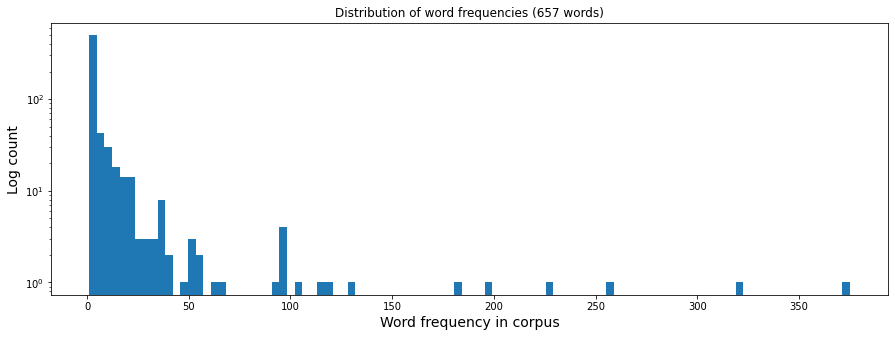

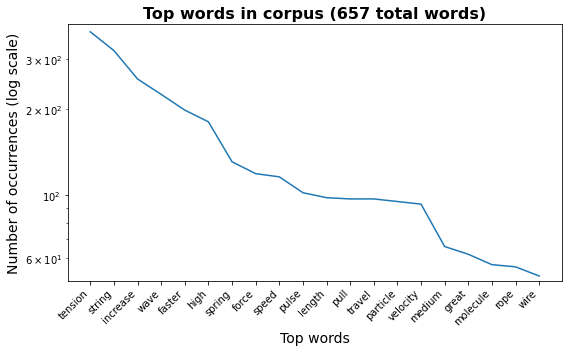

In [4]:
plot_words(corpus)

Let's now figure out the best thresholds for removing the most and least common words. A `no_above` threshold of 70% would remove words used in at least 70% of documents, and a `no_below` threshold of 3 would remove words used in only two or fewer documents. 

In [5]:
display_words_removed_at_thresholds(bigrams)


NO ABOVE THRESHOLDS


Dictionary with no_above=1 contains 657 unique words

Dictionary filtered with no_above=1.00 contains 657 unique words. 0 words removed:
 [] 

Dictionary filtered with no_above=0.90 contains 657 unique words. 0 words removed:
 [] 

Dictionary filtered with no_above=0.80 contains 657 unique words. 0 words removed:
 [] 

Dictionary filtered with no_above=0.70 contains 657 unique words. 0 words removed:
 [] 

Dictionary filtered with no_above=0.60 contains 656 unique words. 1 words removed:
 ['tension'] 

Dictionary filtered with no_above=0.50 contains 656 unique words. 0 words removed:
 [] 

Dictionary filtered with no_above=0.40 contains 653 unique words. 3 words removed:
 ['faster', 'string', 'wave'] 

Dictionary filtered with no_above=0.30 contains 651 unique words. 2 words removed:
 ['high', 'increase'] 

Dictionary filtered with no_above=0.20 contains 645 unique words. 6 words removed:
 ['force', 'pulse', 'speed', 'spring', 'travel', 'velocity'] 

Dictionary f

You can now set the desired threshold values based on this particular data set. 

In [6]:
no_above = 0.2
no_below = 3

In [7]:
bow, id2word= create_bow(corpus, bigrams, no_above, no_below, 
                         display_removed_words = False)

We can now proceed with the actual modeling process. Here, you can set a number of topics desired for the model, as well as the number of responses to display for each topic. By default, the number of responses displayed is three, but that can be overridden by setting a value. 

In [22]:
num_topics = 6
num_responses_displayed = 5

In [23]:
model = LDA_model(bow, id2word, bigrams, 
                  num_topics = num_topics)
model.show_topics(num_words = 10, 
                  num_topics = num_topics)

Coherence of model with 6 topics: 0.5040878198546351




[(0,
  '0.051*"mass" + 0.042*"point" + 0.041*"scenario" + 0.038*"second" + 0.037*"result" + 0.034*"creates" + 0.033*"big" + 0.032*"low" + 0.030*"square_root" + 0.029*"get"'),
 (1,
  '0.191*"particle" + 0.111*"pull" + 0.041*"shorter_time" + 0.038*"mean" + 0.035*"motion" + 0.030*"period" + 0.028*"energy" + 0.027*"position" + 0.024*"piece" + 0.024*"know"'),
 (2,
  '0.063*"great" + 0.049*"move" + 0.040*"rope" + 0.039*"medium" + 0.032*"molecule" + 0.031*"restore_force" + 0.025*"pull" + 0.024*"mean" + 0.023*"equilibrium" + 0.021*"material"'),
 (3,
  '0.044*"equilibrium" + 0.041*"pull" + 0.033*"return" + 0.031*"tighter" + 0.031*"scenario" + 0.028*"position" + 0.025*"quickly" + 0.024*"time" + 0.024*"distance" + 0.024*"quicker"'),
 (4,
  '0.148*"length" + 0.093*"wire" + 0.061*"molecule" + 0.045*"mu" + 0.045*"tend_decrease" + 0.042*"equation" + 0.042*"density" + 0.034*"decrease" + 0.032*"ultimately" + 0.032*"tend"'),
 (5,
  '0.063*"medium" + 0.054*"change" + 0.052*"energy" + 0.051*"frequency" + 

In [24]:
display_n_responses(df, num_responses_displayed, model, corpus, bow)

Topic 0: 0.051*"mass" + 0.042*"point" + 0.041*"scenario" + 0.038*"second" + 0.037*"result" + 0.034*"creates" + 0.033*"big" + 0.032*"low" + 0.030*"square_root" + 0.029*"get"


,resp,0,1,2,3,4,5
224,"Scenario 2 creates a faster pulse because the Kinetic energy increases in the second scenario since tightening the spring increases the K constant of the spring. If you solved for velocity in either scenario, it would be larger in the second scenario because Kinetic energy is larger overall.",0.978386,0.0,0.000000,0.0,0.0,0.000000
249,"This phenomenon makes sense because the equation for velocity is the square root of tension over mu. If the tension is greater, then the speed will be greater as a result because it will be a bigger number divided by the same value of mu.",0.973545,0.0,0.000000,0.0,0.0,0.000000
2,"The velocity of a wave(pulse) on a string is equal to the square root of Tension over the mass-density of the string. so V(wave)=sqrt(T/u)/ Therefore, if you increase the Tension, which is in the numerator, then it follows that you increase the calculated number underneath the root and as numbers increase, so do there square roots, so it follows the the velocity of the wave dur to the higher tension must be higher.",0.971411,0.0,0.000000,0.0,0.0,0.000000
118,You have to put more energy into the system of a more tense string causing it to have a greater kinetic energy that results in a greater velocity.,0.957782,0.0,0.011327,0.0,0.0,0.011338
140,"If the string isn't taut (low tension) then the weight of the string will make it ""dip"". If you then flick your wrist to create a pulse, part of it becomes ""destroyed"" due to the dip being on the opposite side of the horizontal of the pulse.",0.952072,0.0,0.012858,0.0,0.0,0.012872





Topic 1: 0.191*"particle" + 0.111*"pull" + 0.041*"shorter_time" + 0.038*"mean" + 0.035*"motion" + 0.030*"period" + 0.028*"energy" + 0.027*"position" + 0.024*"piece" + 0.024*"know"


,resp,0,1,2,3,4,5
241,"When we pull the string in the outward direction we are pulling the particles away from each other and this will increase the ability of a particle to pull its neighbor particle. As we all know that due to high pulling force we will have high tension force in the string/body. So, due to high attraction or restraining force particle will complete its motion about its mean position in shorter time. Thus increasing the rate of flow of energy and that is also known as the velocity of the wave. Greater the forces between particle, shorter will the time period of the particles hence wave will move faster under high tension.",0.0,0.988963,0.0,0.0,0.0,0.0
64,"When we pull the string in the outward direction we are pulling the particles away from each other and this will increase the ability of a particle to pull its neighbor particle. As we all know that due to high pulling force we will have high tension force in the string/body. So, due to high attraction or restraining force particle will complete its motion about its mean position in shorter time. Thus increasing the rate of flow of energy and that is also known as the velocity of the wave. Greater the forces between particle, shorter will the time period of the particles hence wave will move faster under high tension.",0.0,0.988963,0.0,0.0,0.0,0.0
61,"When we pull the string in the outward direction we are pulling the particles away from each other and this will increase the ability of a particle to pull its neighbor particle. As we all know that due to high pulling force we will have high tension force in the string/body. So, due to high attraction or restraining force particle will complete its motion about its mean position in shorter time. Thus increasing the rate of flow of energy and that is also known as the velocity of the wave. Greater the forces between particle, shorter will the time period of the particles hence wave will move faster under high tension.",0.0,0.988963,0.0,0.0,0.0,0.0
207,"When we pull the string in the outward direction we are pulling the particles away from each other and this will increase the ability of a particle to pull its neighbor particle. As we all know that due to high pulling force we will have high tension force in the string/body. So, due to high attraction or restraining force particle will complete its motion about its mean position in shorter time. Thus increasing the rate of flow of energy and that is also known as the velocity of the wave. Greater the forces between particle, shorter will the time period of the particles hence wave will move faster under high tension.",0.0,0.988963,0.0,0.0,0.0,0.0
160,"When the string is pulled, the particles move away from each other and this will increase the ability of a particle to pull its neighbor particle. If we pull the rope, there will be high tension in the rope. So, due to high attraction or restraining force particle will complete its motion about its mean position in shorter time. Thus increasing the rate of flow of energy and that is also known as the velocity of the wave. Greater the forces between particle, shorter will the time period of the particles hence wave will move faster under high tension.",0.0,0.987796,0.0,0.0,0.0,0.0





Topic 2: 0.063*"great" + 0.049*"move" + 0.040*"rope" + 0.039*"medium" + 0.032*"molecule" + 0.031*"restore_force" + 0.025*"pull" + 0.024*"mean" + 0.023*"equilibrium" + 0.021*"material"


,resp,0,1,2,3,4,5
42,"The tighter the string the less time it takes for a pulse to reach the end of the string. My intuition says that since one is pulling the string, one is causing the string to slightly decrease in thickness due to the stretch of the rope. This causes the rope to have less weight per unit. This allows for the wave to travel faster since the wave only moves smaller units of mass than it did when it was loose.",0.0,0.0,0.986044,0.0,0.0,0.0
220,"from the formula v = sqrt(T/mue) T is tension, v is directly proportional to tension and inversely proportional to the linear mass density so when we increase the tension of the string then the speed should increase as well. I always think of a slinky and how when it is stretched out far the transverse wave travels to the other end faster than when it doesn't have as much tension. One explanation for this that I read is the molecules are more dispersed with more tension and they want to get back to equilibrium faster so they snap back into place faster which pushes the energy throuhg the medium faster...essentially increasing the speed of the wave",0.0,0.0,0.986043,0.0,0.0,0.0
243,"I think the wave moves faster because it takes more force to make the amplitude high in a tense rope, meaning that the tense rope pulls forces in the horizontal direction, making the wave move faster on that direction, rather than making the amplitude higher.",0.0,0.0,0.981786,0.0,0.0,0.0
31,"The pulse moves faster in scenario 2 because when taut, the string is more resistant to moving, so the wave travels faster so the string can go to equilibrium again. In scenario 1, the string isn't as resistant, so the velocity is more and the wave takes its time moving along the string because it doesn't have as much force pushing it back to equilibrium.",0.0,0.0,0.975910,0.0,0.0,0.0
290,"by applying tension, the length of the rope changes and distance needed to be traveled changes, so in order to take the same amount of time to reach the end, the rope with more tension has to have a faster pulse.",0.0,0.0,0.975908,0.0,0.0,0.0





Topic 3: 0.044*"equilibrium" + 0.041*"pull" + 0.033*"return" + 0.031*"tighter" + 0.031*"scenario" + 0.028*"position" + 0.025*"quickly" + 0.024*"time" + 0.024*"distance" + 0.024*"quicker"


,resp,0,1,2,3,4,5
264,"Without using any equations just intuition, i would say: the more tension means each small unit of the spring can communicate the movement to the next small unit of spring quicker. Kind of like if I had a line of bowling balls and I rolled one into the beginning one, the distance between each subsequent ball will need to be traversed for each initial ball to 'communicate' its movement to the next. So the smaller that distance the faster the message gets across and with a tight spring those 'bowling balls' are close together. And this extra distance in the spring is the 'slack' thats created from lack of tension.",0.0,0.0,0.0,0.985971,0.0,0.0
25,"This is something that's so intuitive it's hard to explain it. I used to take the kitchen phone handset, pull it really far from the base, and send waves down it. I would do experiments pulling it different tensions and sending waves down. I guess when it's tighter, a string or a spring tries harder to return to its equilibrium position because each atom pulls harder on its neighbor, over to where it's attached. So in the quest to return to equilibrium, it sends the wave faster.",0.0,0.0,0.0,0.983078,0.0,0.0
222,The higher tension in the string results in a larger restoring forces which means that there is a larger acceleration for the string to return to its equilibrium position. The larger acceleration means the displacement will return to equilibrium faster.,0.0,0.0,0.0,0.978679,0.0,0.0
267,"The speed at which a mechanical wave propagates through a medium has to do with how quickly the medium reverts back to its equilibrium position after being disturbed. The faster the medium snaps back, the faster the wave can move through it. Thus if the string is tighter, it is going to want to come back to its original position more than if it was loose, therefore tension will increase the pulse.",0.0,0.0,0.0,0.978679,0.0,0.0
173,"Since there is more slack in the spring in scenario 1, there is more extra or unnecessary movement, but when the spring is pulled taut in scenario 2, there isn't really any extra movement, so the pulse moves from point A to point B much faster.",0.0,0.0,0.0,0.975498,0.0,0.0





Topic 4: 0.148*"length" + 0.093*"wire" + 0.061*"molecule" + 0.045*"mu" + 0.045*"tend_decrease" + 0.042*"equation" + 0.042*"density" + 0.034*"decrease" + 0.032*"ultimately" + 0.032*"tend"


,resp,0,1,2,3,4,5
313,"\sqrt{T/\mu } =The speed in a wire constrained with a tension T. Now if you increase the tension ultimately you tend to increase the length of the wire by a small amount. Now the no. of molecules inside the wire remains constant, When the wire length was not increased the molecule was spread in that particular length but as we increase the length the amount of molecules in the same unit length tend to decrease so the density tend to decrease ultimately. Now from the equation the tension tends to increase and mu tend to decrease, so the velocity overall tend to increase.",0.0,0.0,0.0,0.0,0.990055,0.0
101,"The speed in a wire constrained with a tension T. Now if you increase the tension ultimately you tend to increase the length of the wire by a small amount. Now the no. of molecules inside the wire remains constant, When the wire length was not increased the molecule was spread in that particular length but as we increase the length a number of molecules in the same unit length tend to decrease so the density tend to decrease ultimately. Now from the equation the tension tends to increase and mu tend to decrease, so the velocity overall tend to increase.",0.0,0.0,0.0,0.0,0.989757,0.0
24,"The speed in a wire constrained with a tension T. Now if you increase the tension ultimately you tend to increase the length of the wire by a small amount. Now the no. of molecules inside the wire remains constant, When the wire length was not increased the molecule was spread in that particular length but as we increase the length the amount of molecules in the same unit length tend to decrease so the density tend to decrease ultimately. Now from the equation the tension tends to increase and mu tend to decrease, so the velocity overall tend to increase.",0.0,0.0,0.0,0.0,0.989441,0.0
167,"The speed in a wire constrained with a tension T. Now if you increase the tension ultimately you tend to increase the length of the wire by a small amount. Now the no. of molecules inside the wire remains constant, When the wire length was not increased the molecule was spread in that particular length but as we increase the length the amount of molecules in the same unit length tend to decrease so the density tend to decrease ultimately. Now from the equation the tension tends to increase and mu tend to decrease, so the velocity overall tend to increase.",0.0,0.0,0.0,0.0,0.989441,0.0
235,"The speed in a wire constrained with a tension T. Now if you increase the tension ultimately you tend to increase the length of the wire by a small amount. Now the no. of molecules inside the wire remains constant, When the wire length was not increased the molecule was spread in that particular length but as we increase the length the amount of molecules in the same unit length tend to decrease so the density tend to decrease ultimately. Now from the equation the tension tends to increase and mu tend to decrease, so the velocity overall tend to increase.",0.0,0.0,0.0,0.0,0.989441,0.0





Topic 5: 0.063*"medium" + 0.054*"change" + 0.052*"energy" + 0.051*"frequency" + 0.048*"rope" + 0.035*"sense" + 0.035*"large" + 0.033*"amplitude" + 0.030*"nan" + 0.028*"wavelength"


,resp,0,1,2,3,4,5
310,"I would say that when there is a greater tension in the rope, its much more difficult to deform the rope. its a lot easier to make a wave shape in the rope when its loose than when its tight, just like its easy to coil a rope when its loose and almost impossible when its under tension. This means that when the wave is created, it is forced to travel faster by the medium. Of course the wave cant just create more energy from nothing, so its properties are altered in response to the medium.",0.0,0.0,0.0,0.0,0.0,0.985364
219,"So from the equation velocity=wavelength * frequency, the wavelength stayed the same. However, the frequency changed (making it higher) causing the velocity to increase. I relate this to a guitar. When an open string is plucked, theres a specific wavelength and frequency. When I pluck with the same intensity and same string but placing my finger higher up on the neck, the wavelength doesn't change, but the frequency does. I can verify that, because the frequency is related to pitch, and when a string is plucked higher up the neck, the pitch becomes higher.",0.0,0.0,0.0,0.0,0.0,0.984610
11,"It would make sense for a spring to travel faster when there is a larger tension force because energy is transferred quicker through a tighter medium . A larger tension provides a medium that allows energy to pass through it faster. I believe that on a spring with a larger tension, more energy is transferred horizontally rather than vertically as amplitude.",0.0,0.0,0.0,0.0,0.0,0.982840
285,The pulse moves faster on the higher tension ropes because the higher tension causes the rope to have a larger wavelength and a larger frequency. The less taught rope has a smaller wavelength and a smaller frequency. V= (wavelength)(f),0.0,0.0,0.0,0.0,0.0,0.980611
130,"When the tension is bigger, the amplitude of the wave is not as large as the less taught rope, which means the rope does not displace the medium as much as much as the first rope. With less displacement of the medium that the string is in, the wave is allowed to move faster through the air or water or whatever it is traveling through.",0.0,0.0,0.0,0.0,0.0,0.977714


Potential Ideas from LDA: 

0. 
1. (repeated response)
2. 
3. 
4. (repeated response)
5. 
6. 